<img src = 'http://www.tvhorizonte.com.br/content/uploads/Logo-PUC-Minas-Sobre.png' height="150" width="200">
<p><b><font size = 5 face = 'verdana'> TAREFA AVALIATIVA - REGRESSÃO LOGÍSTICA</font></b></p>

<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de MÉTODO ESTATÍSTICO do curso de Pós-Graduação em Inteligência Artificial, PUC Minas, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSORA:</b> JESSICA DA ASSUNÇÃO ALMEIDA DE LIMA<br> 
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>MATRÍCULA:</b> 1418586</font></p>
<p><font size = 3 face = 'verdana'>
<li>Baixe o script aula 3, módulo 3</li>
<li>Revise o modelo 1 ajustado considerando as componentes 2, 4 e 5 como variáveis independentes</li>
<li>Construa um novo modelo considerando novas variáveis independentes, novas combinações dos componentes 1 a 5,  e compare qual obteve melhor ajuste através do coeficiente de determinação.</li> 
<li>Não esqueça avaliar TODAS as premissas do modelo.</li>
<li>Entregue um script em python com todas as análises e comentários.</li> 
<hr></hr>

In [119]:
# CARREGANDO O NUMPY E PANDAS
import numpy as np
import pandas as pd

In [120]:
# CRIAÇÃO DA VARIÁVEL ENEN COM OS DADOS DO ARQUIVO .CSV
enem = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [121]:
# TRAZENDO AS 10 PRIMEIRAS LINHAS DO DATASET CRIADO.
enem.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
5,"1,90E+11",São José do Rio Preto,18,F,1,branca,1,2,pública,35028927.0,...,612.8,Espanhol,1.0,120.0,160.0,120.0,80.0,100.0,580.0,Não
6,"1,90E+11",Franca,32,M,1,parda,1,1,não_respondeu,NaN,...,584.1,Espanhol,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
7,"1,90E+11",Santo André,20,F,1,parda,1,1,não_respondeu,NaN,...,508.5,Espanhol,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
8,"1,90E+11",São Paulo,26,M,1,branca,1,1,não_respondeu,NaN,...,681.2,Espanhol,1.0,180.0,200.0,200.0,200.0,120.0,900.0,Sim
9,"1,90E+11",Santo André,44,F,2,parda,1,1,não_respondeu,NaN,...,488.1,Espanhol,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim


<p><b><font size = 5 face = 'verdana'> 1 - ANALISE INICIAL</font></b></p>

In [122]:
# UTILIZANDO COLUMNS PARA TRAZER O NOME DE TODAS AS COLUNAS DO DATAFRAME
enem.columns

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'IDADE', 'SEXO',
       'TP_ESTADO_CIVIL', 'RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'ESCOLA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN',
       'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'NOTA_REDACAO',
       'INTERNET'],
      dtype='object')

In [123]:
# UTILIZANDO SHAPE PARA TRAZER O TOTAL DE LINHAS E COLUNAS
# NO TOTAL TEMOS 499940 LINHAS E 28 COLUNAS
enem.shape

(499940, 28)

<p><b><font size = 5 face = 'verdana'>2 - SELECIONANDO O CÓDIGO 35132287 PARA ANALISAR</font></b></p>

In [124]:
# O CÓDIGO DE ESCOLA ESCOLHIDO FOI O 35132287 PARA ANALISARMOS 
colegiox = enem.loc[enem.CO_ESCOLA == 35132287]

In [125]:
# TRAZENDO AS 10 PRIMEIRAS LINHAS DO NOSSO DATASET REFERENTE AO CÓDIGO 35132287
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [126]:
# UTILIZANDO O SHAPE PARA SABERMOS O TOTAL DE LINHAS E COLUNAS
# NO TOTAL CONSIDERANDO O CÓDIGO 35132287 TEMOS 130 LINHAS E 28 COLUNAS
colegiox.shape

(130, 28)

<p><b><font size = 5 face = 'verdana'>3 - TRATANDO VALORES FALTANTES - VALORES MISSING (NA)</font></b></p>
<p><font size = 2 face = 'verdana'>O ISNULL().SUM() FOI UTILIZADO PARA SABERMOS QUANTOS VALORES 'NA' EXISTEM NAS COLUNAS. COMO O RESULTADO É ZERO PARA TODOS, NÃO TEMOS VALORES VAZIOS NO NOSSO DATAFRAME </font></b></p>

In [127]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

<p><b><font size = 5 face = 'verdana'>4 - ANÁLISE DOS TIPOS DAS VARIÁVEIS EXISTENTES NO DATAFRAME</font></b></p>
<p><font size = 2 face = 'verdana'>O DTYPE TRAZ O TIPO DE VARIÁVEL SE É INT64, FLOAT OU OBJECT </font></b></p>

In [128]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

In [129]:
# IMPORTANDO O MATPLOTLIB E O SEABORN PARA PLOTAR GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sns

<p><b><font size = 5 face = 'verdana'>5 - PREMISSA 1 - CORRELAÇÃO</font></b></p>
<p><font size = 2 face = 'verdana'>CORR() É USADO PARA ENCONTRAR A CORRELAÇÃO DE PARES DE TODAS AS COLUNAS NO PANDAS DATAFRAME EM PYTHON. QUAISQUER VALORES NAN SÃO EXCLUÍDOS AUTOMATICAMENTE. QUALQUER TIPO DE DADO NÃO NUMÉRICO OU COLUNAS NO DATAFRAME, ELE É IGNORADO. </font></b></p>

In [130]:
corr_df = colegiox.corr()
corr_df

,IDADE,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO
IDADE,1.000000,-0.098404,0.078486,NaN,NaN,NaN,NaN,NaN,NaN,-0.106800,0.037798,0.046869,0.066813,NaN,0.023549,-0.142967,0.040446,-0.075711,0.018396,-0.050132
TP_ESTADO_CIVIL,-0.098404,1.000000,-0.006033,NaN,NaN,NaN,NaN,NaN,NaN,0.041997,0.019230,0.001524,0.053910,NaN,0.006594,-0.138606,-0.016454,0.037343,-0.078161,-0.063583
TP_NACIONALIDADE,0.078486,-0.006033,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.038380,0.021257,0.033775,0.022446,NaN,-0.007088,0.085495,0.038213,0.063930,0.010658,0.059435
TP_ST_CONCLUSAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_ESCOLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_PRESENCA_CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_PRESENCA_CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_PRESENCA_LC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_PRESENCA_MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOTA_CN,-0.106800,0.041997,0.038380,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.127878,0.171841,-0.074204,NaN,0.081843,0.152235,0.021360,0.036759,0.087528,0.107588


<p><font size = 2 face = 'verdana'>PARA VISUALIZARMOS A MATRIZ DE CORRELAÇÃO, VAMOS UTILIZAR A FUNÇÃO. HEATMAP() DO PACOTE SEABORN, ESSA FUNÇÃO VAI NOS RETORNAR UMA FORMA GRÁFICA DA MATRIZ COM UMA ESCALA DE COR EM CONJUNTO COM UMA ESCALA NUMÉRICA, AS QUAIS VÃO INDICAR O GRAU MEDIDO ENTRE AS VARIÁVEIS.</font></b></p>

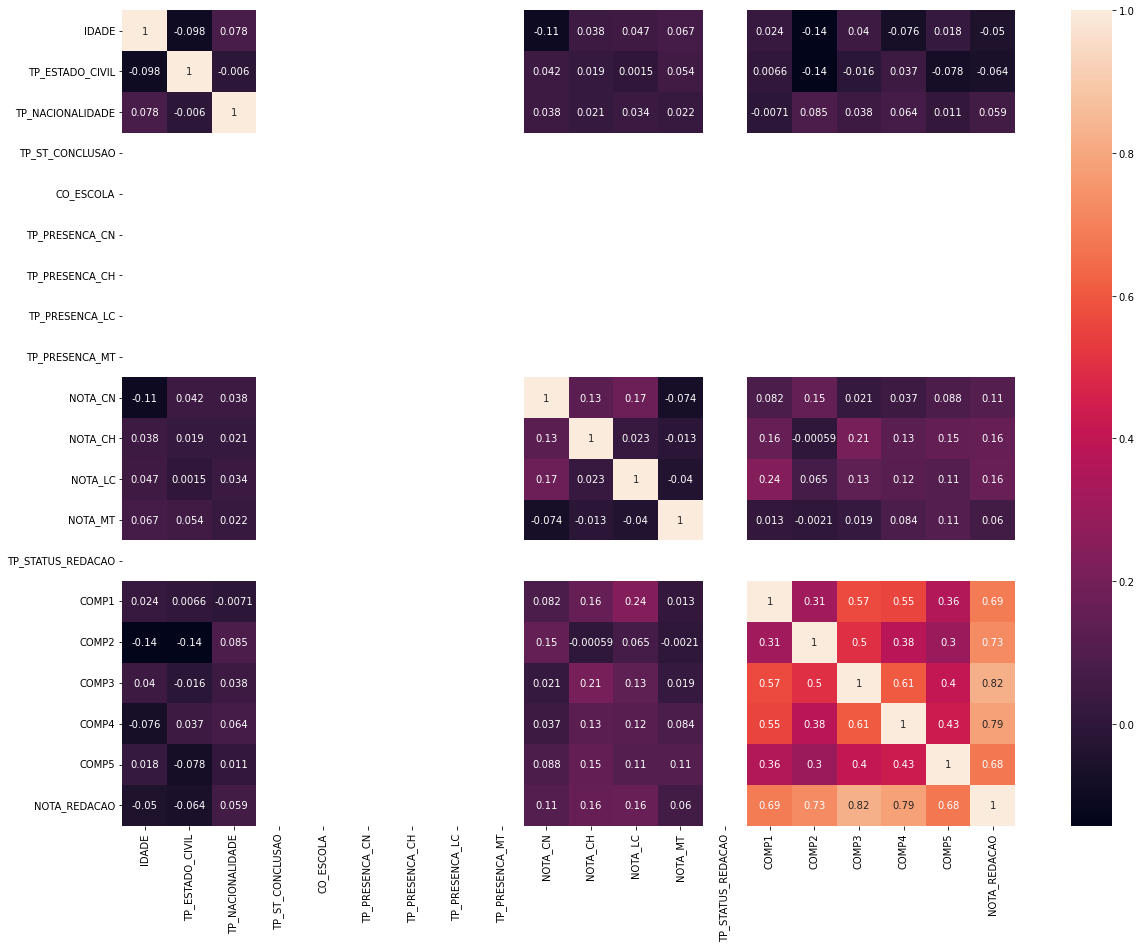

In [131]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df, annot=True)
plt.show()

<p><b><font size = 5 face = 'verdana'>REGRESSÃO LINEAR MÚLTIPLA COM STATISMODEL</font></b></p>
<p><font size = 2 face = 'verdana'>O STATSMODELS É UM MÓDULO PYTHON QUE FORNECE VÁRIAS FUNÇÕES PARA A ESTIMATIVA DE MUITOS MODELOS ESTATÍSTICOS DIFERENTES, ASSIM COMO TESTES ESTATÍSTICOS E A EXPLORAÇÃO DE DADOS ESTATÍSTICOS. </font></b></p>

<b>IMPORTANDO A BIBLIOTECA DO STATSMODELS</b>

In [132]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

<p><b><font size = 5 face = 'verdana'>CRIAÇÃO DOS MODELOS 1 E 2</font></b></p>

<b><span style="color:blue">Revisando o modelo 1 ajustado considerando as componentes 2, 4 e 5 como variáveis independentes. E construção de um novo modelo considerando novas variáveis independentes, componentes 1,2 e 3 - comparação do melhor ajuste através do coeficiente de determinação.</span></b>
<hr></hr>

In [133]:
# Criação do MODELO 1
# Y = bo + b1x1 + ... + bpxp

# NOTA_REDACAO = bo + b1*COMP2 + b2*COMP4 + b3*COMP5
# Intercept = bo
# NOTA_REDACAO = 116.1987 + 1.2831*COMP2 + 1.7298*COMP4 + 1.1993*COMP5

<b><span style="color:blue">MODELO 1 - Revisando o modelo 1 ajustado considerando as componentes 2, 4 e 5 como variáveis independentes. </span></b>
<hr></hr>

In [134]:
modelo1 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegiox).fit()

<b><span style="color:blue">MODELO 2 - construção de um novo modelo considerando novas variáveis independentes, componentes 1,2 e 3 - comparação do melhor ajuste através do coeficiente de determinação.</span></b>
<hr></hr>

In [135]:
modelo2 = smf.ols('NOTA_REDACAO ~ COMP1 + COMP2 + COMP3', data = colegiox).fit()

<p><b><font size = 3 face = 'verdana'>TESTE DE HIPÓTESE DE SIGNIFICÂNCIA ESTATÍSITICA DO MODELO CONSTRUÍDO</font></b></p>
<p><font size = 2 face = 'verdana'>Ho = o modelo é significativo<br>
Ha = o modelo não é significativo<br>
Prob (F-statistic) < 0.05 ==> valida o nosso modelo de regressão ajustado </font></b></p>




<p><b><font size = 3 face = 'verdana'>TESTE DE HIPÓTESE - SIGNIFICÂNCIA DOS COEFICIENTES AJUSTADOS</font></b></p>
<p><font size = 2 face = 'verdana'>Valida cada coeficiente da regressão - P>|t| < 0.05<br>
Ho = o coeficiente é significativo<br>
Ha = o coeficiente não é significativo</font></b></p>

<b><span style="color:blue">SUMMARY MODELO 1 - FAZENDO O PRINT DO MODELO 1 PARA ANÁLISE</span></b>
<hr></hr>
<span style="color:blue">Conforme informações do SUMMARY o <b>coeficiente de determinação representa 92,40%</b> da variabilidade existente na <b>NOTA DE REDAÇÃO do ENEM</b> está sendo explicada pelas varíaveis <b>COMP1, COMP4 e COMP 5</b>.</span>
<hr></hr>

In [136]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           3.97e-70
Time:                        19:02:53   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0

In [137]:
modelo1.aic

1216.59304638052

<b><span style="color:blue">SUMMARY MODELO 2 - FAZENDO O PRINT DO MODELO 2 PARA ANÁLISE</span></b>
<hr></hr>
<span style="color:blue">Conforme informações do SUMMARY o <b>coeficiente de determinação representa 87,30%</b> da variabilidade existente na <b>NOTA DE REDAÇÃO do ENEM</b> está sendo explicada pelas varíaveis <b>COMP1, COMP2 e COMP3</b>.</span>
<hr></hr>

In [138]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     288.2
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           3.25e-56
Time:                        19:02:53   Log-Likelihood:                -637.38
No. Observations:                 130   AIC:                             1283.
Df Residuals:                     126   BIC:                             1294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.8643     30.300      2.834      0.0

In [139]:
modelo2.aic

1282.755236232638

<b><span style="color:blue">ANÁLISE DA PREMISSA DO MODELO 1</span></b>
<hr></hr>

In [140]:
import scipy.stats as stats

<b><span style="color:blue">ei = NOTA_REDACAO - ^yi (116.1987 + 1.2831*140 + 1.7298*160 + 1.1993*160)</span></b>
<hr></hr>



In [141]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


<b><span style="color:blue">RESÍDUOS MODELO 1 - PRINT DO RESÍDUOS DO MODELO 1 PARA ANÁLISE</span></b>
<hr></hr>

In [142]:
residuos1 = modelo1.resid
residuos1

17        -4.498054
10760     33.309358
13315     -5.718021
20006    -26.432059
26697      1.349594
            ...    
426829    35.760528
428241   -17.683137
443242   -17.497499
462446   -56.783460
483420    34.529325
Length: 130, dtype: float64

<b><span style="color:blue">RESÍDUOS MODELO 2 - PRINT DO RESÍDUOS DO MODELO 2 PARA ANÁLISE</span></b>
<hr></hr>

In [143]:
residuos2 = modelo2.resid
residuos2

17        -5.189662
10760    -49.187880
13315    -17.925079
20006     -8.650254
26697     26.693802
            ...    
426829   -34.621652
428241   -57.387453
443242   -31.953682
462446     3.270273
483420   -36.452462
Length: 130, dtype: float64

ei = NOTA_REDACAO - ^yi (116.1987 + 1.2831*140 + 1.7298*160 + 1.1993*160)

<b><span style="color:blue">CRIAÇÃO DE DUAS COLUNAS DISPONDO OS RESULTADOS DE RESÍDUOS DO MODELO 1 E RESÍDUOS DO MODELO 2</span></b>
<hr></hr>

In [144]:
colegiox['residuos1'] = residuos1
colegiox['residuos2'] = residuos2
colegiox.head()

C:\Users\Oser Xavier\AppData\Local\Temp\ipykernel_11376\4187837668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['residuos1'] = residuos1
C:\Users\Oser Xavier\AppData\Local\Temp\ipykernel_11376\4187837668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['residuos2'] = residuos2


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,residuos1,residuos2
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,-4.498054,-5.189662
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,33.309358,-49.187880
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,-5.718021,-17.925079
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,-26.432059,-8.650254
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,1.349594,26.693802


<b><span style="color:blue">PREMISSA 2 - NORMALIDADE DOS RESÍDUOS</span></b>
<hr></hr>
<span style="color:blue">SHAPIRO - WILK<br>
HO = OS RESIDUOS TEM DISTRIBUIÇÃO NORMAL: P > 0.05<br>
HA = OS RESIDUOS NÃO TEM DISTRIBUIÇÃO NORMAL: P <= 0.05<br>
</span><br>
<span style="color:blue">O Teste de Shapiro-Wilk tem como objetivo avaliar se uma distribuição é semelhante a uma distribuição normal. A distribuição normal também pode ser chamada de gaussiana e sua forma assemelha-se a de um sino. Esse tipo de distribuição é muito importante, por ser frequentemente usada para modelar fenômenos naturais.</span>
<hr></hr>

In [145]:
estatistica, p1 = stats.shapiro(residuos1)
estatistica, p2 = stats.shapiro(residuos2)

<b><span style="color:blue">P-VALUE - MODELO 1 E MODELO 2</span></b>
<hr></hr>

<span style="color:blue">Um p-value é uma medida de quanta evidência você tem contra a hipótese nula. Quanto menor o p-value, mais evidência você tem. Deve-se combinar o p-value com o nível de significância para tomar decisão sobre um dado teste de hipótese. Em tal caso, se o p-value for menor que algum corte (usualmente 0,05, algumas vezes um pouco mais como 0,1 ou um pouco menos como 0,01) então você rejeita a hipótese nula.</span>
<hr></hr>

In [146]:
print('P-VALOR MODELO 1: {}'.format(p1))
print('P-VALOR MODELO 2: {}'.format(p2))

P-VALOR MODELO 1: 0.15436169505119324
P-VALOR MODELO 2: 0.10399046540260315


<b><span style="color:blue">GRÁFICO Q-Q PLOT</span></b>
<hr></hr>

<span style="color:blue">Em estatística, um gráfico Q–Q ( gráfico quantil-quantil ) é um gráfico de probabilidade, um método gráfico para comparar duas distribuições de probabilidade plotando seus quantis um contra o outro.</span>
<hr></hr>
<b><span style="color:blue">GRÁFICO Q-Q PLOT - MODELO 1</span></b>
<hr></hr>

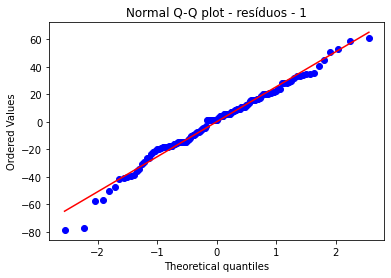

In [147]:
stats.probplot(residuos1, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - resíduos - 1')
plt.show()

<hr></hr>
<b><span style="color:blue">GRÁFICO Q-Q PLOT - MODELO 2</span></b>
<hr></hr>

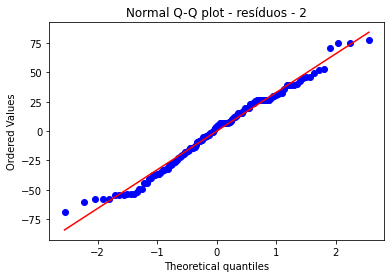

In [148]:
stats.probplot(residuos2, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - resíduos - 2')
plt.show()

<b><span style="color:blue">PREMISSA 3 - HOMOCEDASTICIDADE - MODELO 1</span></b>
<hr></hr>

<span style="color:blue">RESÍDUOS COM VARIAÇÃO CONSTANTE</span>
<hr></hr>

Text(0.5, 0, 'Valores Previstos')

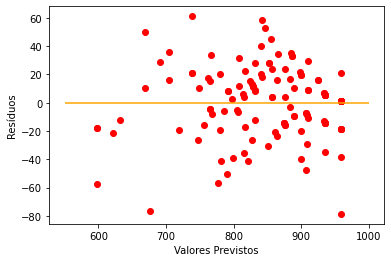

In [149]:
plt.scatter(y=residuos1, x=modelo1.predict(), color='red')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Previstos')

<b><span style="color:blue">PREMISSA 3 - HOMOCEDASTICIDADE - MODELO 2</span></b>
<hr></hr>

<span style="color:blue">RESÍDUOS COM VARIAÇÃO CONSTANTE</span>
<hr></hr>

Text(0.5, 0, 'Valores Previstos')

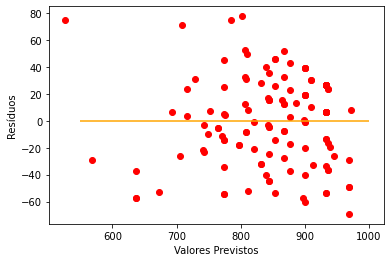

In [150]:
plt.scatter(y=residuos2, x=modelo2.predict(), color='red')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Previstos')

<span style="color:blue">TESTE BREUSCH-PAGAN (HOMOCEDASTICIDADE/HETEROCEDASTICIDADE)<br>
HO = EXISTE HOMOCEDASTICIDADE: P > 0.05<br>
HA = NÃO EXISTE HOMOCEDASTICIDADE: P <= 0.05</span>
<hr></hr>

In [151]:
from statsmodels.compat import lzip

In [152]:
estatistica, p1, f, fp = sms.het_breuschpagan(modelo1.resid, modelo1.model.exog)
estatistica, p2, f, fp = sms.het_breuschpagan(modelo1.resid, modelo2.model.exog)

In [153]:
print('p-valor - MODELO 1: {}'.format(p1))
print('p-valor - MODELO 2: {}'.format(p2))

p-valor - MODELO 1: 0.04727168987447965
p-valor - MODELO 2: 0.0015559991204891208


<b><span style="color:blue">PREMISSA 4 - OUTLIERS NOS RESÍDUOS</span></b>
<hr></hr>

<span style="color:blue">VALORES DE RESÍDUOS QUE ESTÃO FORA DO INTERVALO (-3,3)</span>
<hr></hr>

In [154]:
outliers1 = modelo1.outlier_test()
outliers2 = modelo2.outlier_test()

In [155]:
outliers1.max()

student_resid    2.466219
unadj_p          0.957876
bonf(p)          1.000000
dtype: float64

In [156]:
outliers2.max()

student_resid    2.514503
unadj_p          0.986231
bonf(p)          1.000000
dtype: float64

In [157]:
outliers1.min()

student_resid   -3.260297
unadj_p          0.001434
bonf(p)          0.186452
dtype: float64

In [158]:
outliers2.min()

student_resid   -2.148003
unadj_p          0.013190
bonf(p)          1.000000
dtype: float64

<b><span style="color:blue">PREMISSA 5 - MULTICOLINEARIDADE</span></b>
<hr></hr>

<span style="color:blue">
<li>Somente as variáveis independentes</li>
<li>Considerar como problema de multicolinearidade quando você encontrar r > 0.9</li>
</span>

In [159]:
variaveis1 = colegiox[['COMP2', 'COMP4', 'COMP5']]
variaveis2 = colegiox[['COMP1', 'COMP2', 'COMP3']]

In [160]:
variaveis1.head()

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0


In [161]:
variaveis2.head()

,COMP1,COMP2,COMP3
17,160.0,140.0,140.0
10760,180.0,200.0,200.0
13315,160.0,140.0,160.0
20006,140.0,180.0,160.0
26697,160.0,200.0,200.0


In [162]:
correlacoes1 = variaveis1.corr()
correlacoes1

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


In [163]:
correlacoes2 = variaveis2.corr()
correlacoes2

,COMP1,COMP2,COMP3
COMP1,1.000000,0.313556,0.569305
COMP2,0.313556,1.000000,0.500638
COMP3,0.569305,0.500638,1.000000


Fator de Inflação de Variancia - VIF (baseado no coeficiente de determinação)
- Esse valor deve ser menor 5

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [169]:
vif1 = add_constant(variaveis1) # função pra calcular o vif espera uma constante
pd.Series([variance_inflation_factor(vif1.values, j) for j in range(vif1.shape[1])], index=vif1.columns)

const    72.466982
COMP2     1.196714
COMP4     1.335832
COMP5     1.259221
dtype: float64

In [170]:
vif2 = add_constant(variaveis2) # função pra calcular o vif espera uma constante
pd.Series([variance_inflation_factor(vif2.values, j) for j in range(vif2.shape[1])], index=vif2.columns)

const    108.925679
COMP1      1.481909
COMP2      1.336618
COMP3      1.783132
dtype: float64

<p><b><font size = 5 face = 'verdana'>CALCULANDO PREVISÃO</font></b></p>
<hr></hr>
<p><font size = 2 face = 'verdana'>NO CÓDIGO ABAIXO FOI CRIADO UMA COLUNA COM A PREVISÃO</font></p>

In [167]:
colegiox['previsao1'] = modelo1.fittedvalues
colegiox['previsao2'] = modelo2.fittedvalues

C:\Users\Oser Xavier\AppData\Local\Temp\ipykernel_11376\3386327620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao1'] = modelo1.fittedvalues
C:\Users\Oser Xavier\AppData\Local\Temp\ipykernel_11376\3386327620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao2'] = modelo2.fittedvalues


In [168]:
colegiox

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,residuos1,residuos2,previsao1,previsao2
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,140.0,140.0,160.0,160.0,760.0,Sim,-4.498054,-5.189662,764.498054,765.189662
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,200.0,200.0,200.0,140.0,920.0,Sim,33.309358,-49.187880,886.690642,969.187880
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,140.0,160.0,200.0,120.0,780.0,Sim,-5.718021,-17.925079,785.718021,797.925079
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,180.0,160.0,180.0,140.0,800.0,Sim,-26.432059,-8.650254,826.432059,808.650254
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,200.0,200.0,200.0,200.0,960.0,Sim,1.349594,26.693802,958.650406,933.306198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426829,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,120.0,160.0,140.0,160.0,740.0,Sim,35.760528,-34.621652,704.239472,774.621652
428241,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35132287.0,...,120.0,120.0,120.0,100.0,580.0,Sim,-17.683137,-57.387453,597.683137,637.387453
443242,"1,90E+11",São Paulo,17,F,1,amarela,1,2,privada,35132287.0,...,200.0,160.0,160.0,140.0,800.0,Sim,-17.497499,-31.953682,817.497499,831.953682
462446,"1,90E+11",São Paulo,18,M,1,branca,1,2,privada,35132287.0,...,160.0,140.0,180.0,120.0,720.0,Sim,-56.783460,3.270273,776.783460,716.729727
